In [3]:
import pandas as pd
import numpy as np

df_alpha = pd.read_csv('pre-processing final/cdr3_alpha_df.csv')
df_beta = pd.read_csv('pre-processing final/cdr3_beta_df.csv')
df_combined = pd.read_csv('pre-processing final/cdr3_alpha_beta_df.csv')

In [7]:
human_alpha = df_alpha[df_alpha['species'] == 'HomoSapiens']
human_beta = df_beta[df_beta['species'] == 'HomoSapiens']
human = df_combined[df_combined['species'] == 'HomoSapiens']
mouse_alpha = df_alpha[df_alpha['species'] == 'MusMusculus']
mouse_beta = df_beta[df_beta['species'] == 'MusMusculus']
mouse = df_combined[df_combined['species'] == 'MusMusculus']

In [9]:
from encoders.GIANA_encoder import GIANA_encoder_pd
human= GIANA_encoder_pd(human,chains=['alpha', 'beta'])
human_alpha=GIANA_encoder_pd(human_alpha,chains=['alpha'])
human_beta=GIANA_encoder_pd(human_beta,chains=['beta'])
mouse= GIANA_encoder_pd(mouse,chains=['alpha', 'beta'])
mouse_alpha=GIANA_encoder_pd(mouse_alpha,chains=['alpha'])
mouse_beta=GIANA_encoder_pd(mouse_beta,chains=['beta'])

D:\Program Files (x86)\dsmp-2024-group4\encoders\GIANA_encoder.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdr3_output=np.concatenate((cdr3_alpha_array, cdr3_beta_array), axis=1).tolist()
D:\Program Files (x86)\dsmp-2024-group4\encoders\GIANA_encoder.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdr3_alpha_encoded = [EncodingCDR3(seq[ST:-2], M6, n0) for seq in cdr3_alpha]
D:\Program Files (x86)\dsmp-2024-group4\encoders\GIANA_encoder.py:39: SettingWithCopyWarning: 
A value is trying to be se

# DIMENSIONALITY REDUCTION:

DIMENSIONALITY REDUCTION FOR MOUSE SPECIES FOR ALPHA CHAIN

D:\Program Files (x86)\python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


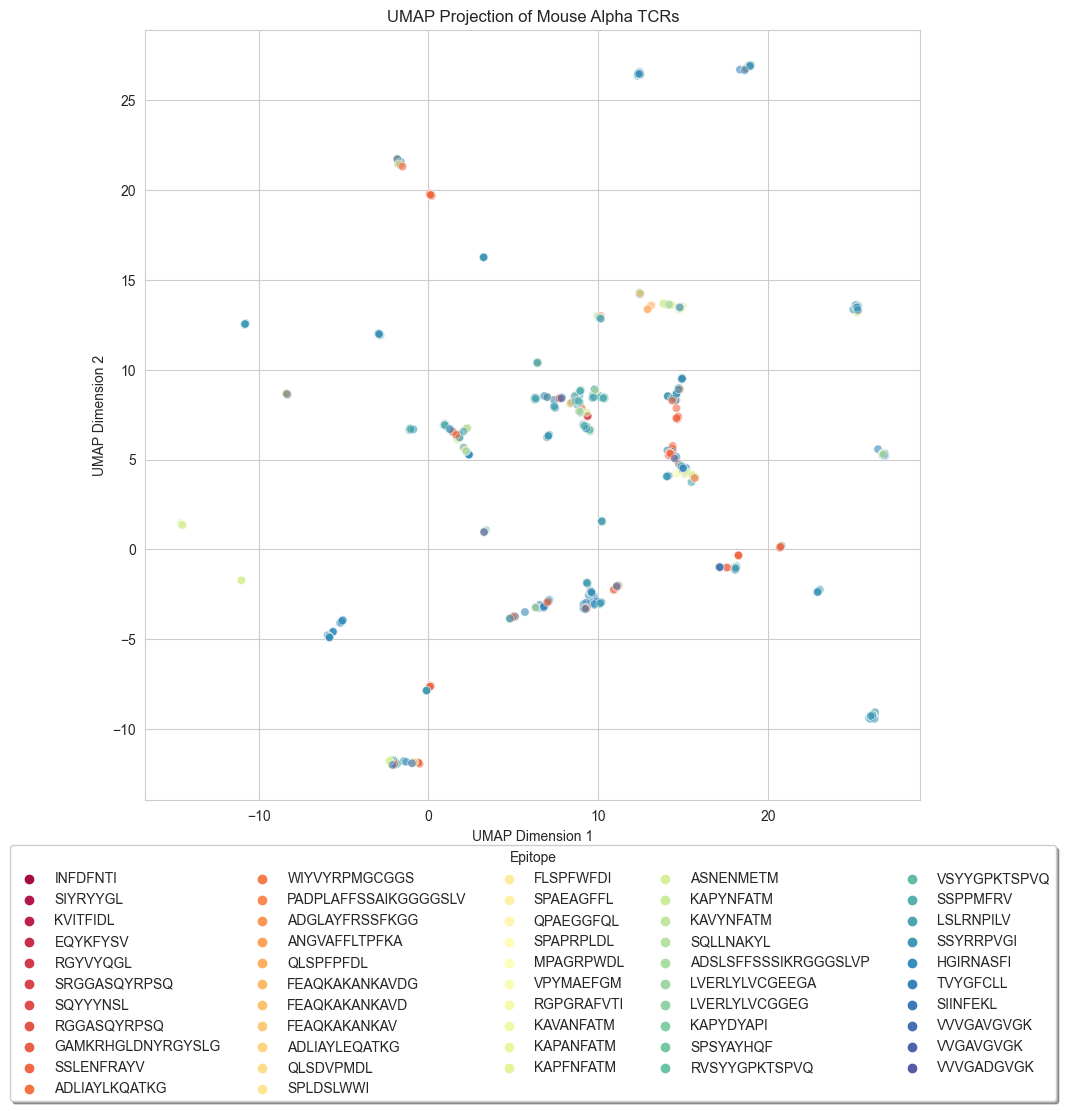

In [24]:
import seaborn as sns
from umap import UMAP
import matplotlib.pyplot as plt

# Assuming your distance matrix is called `mouse_alpha_matrix`
# and the corresponding epitopes are in `mouse_alpha_epitopes`
# Assuming 'mouse_alpha' is your DataFrame with TCR data for the alpha chains of human species
# The DataFrame has a column 'epitope' which contains the epitope information for each TCR
mouse_alpha_epitopes = mouse_alpha['epitope']

# Apply UMAP dimensionality reduction
reducer = UMAP(random_state=42)
encoded_cdr3 = mouse_alpha['encoded_cdr3']
encoded_cdr3=np.array(encoded_cdr3.tolist())
mouse_alpha_embedding = reducer.fit_transform(encoded_cdr3)

# Create a DataFrame for the reduced data
embedding_df = pd.DataFrame(mouse_alpha_embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['epitope'] = mouse_alpha_epitopes.values  # Ensure this is the correct corresponding epitope information

# Plot using seaborn
plt.figure(figsize=(10, 10))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='epitope', palette='Spectral', alpha=0.6)

# Add a title and labels
plt.title('UMAP Projection of Mouse Alpha TCRs')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Move the legend out of the plot
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)

plt.show()

DIMENSIONALITY REDUCTION FOR MOUSE SPECIES FOR BETA CHAIN

D:\Program Files (x86)\python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


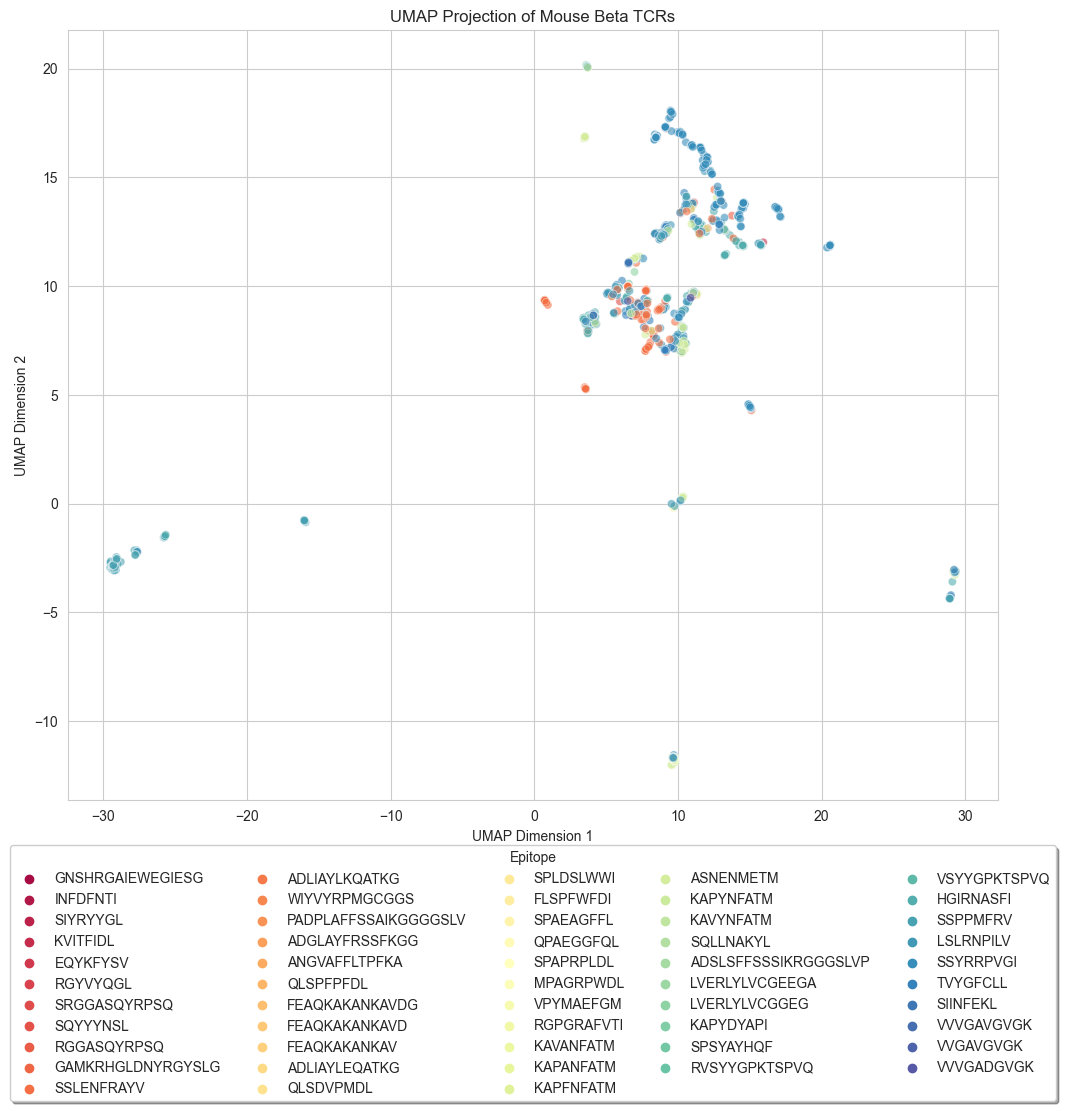

In [25]:
import seaborn as sns
from umap import UMAP

# Assuming your distance matrix is called `mouse_beta_matrix`
# and the corresponding epitopes are in `mouse_beta_epitopes`
# Assuming 'mouse_beta' is your DataFrame with TCR data for the alpha chains of human species
# The DataFrame has a column 'epitope' which contains the epitope information for each TCR
mouse_beta_epitopes = mouse_beta['epitope']

# Apply UMAP dimensionality reduction
reducer = UMAP(random_state=42)
encoded_cdr3 = mouse_beta['encoded_cdr3']
encoded_cdr3=np.array(encoded_cdr3.tolist())
mouse_beta_embedding = reducer.fit_transform(encoded_cdr3)

# Create a DataFrame for the reduced data
embedding_df = pd.DataFrame(mouse_beta_embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['epitope'] = mouse_beta_epitopes.values  # Ensure this is the correct corresponding epitope information

# Plot using seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='epitope', palette='Spectral', alpha=0.6)

# Add a title and labels
plt.title('UMAP Projection of Mouse Beta TCRs')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Move the legend out of the plot
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)

plt.show()


DIMENSIONALITY REDUCTION FOR MOUSE SPECIES FOR COMBINED ALPHA AND BETA CHAINS

D:\Program Files (x86)\python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


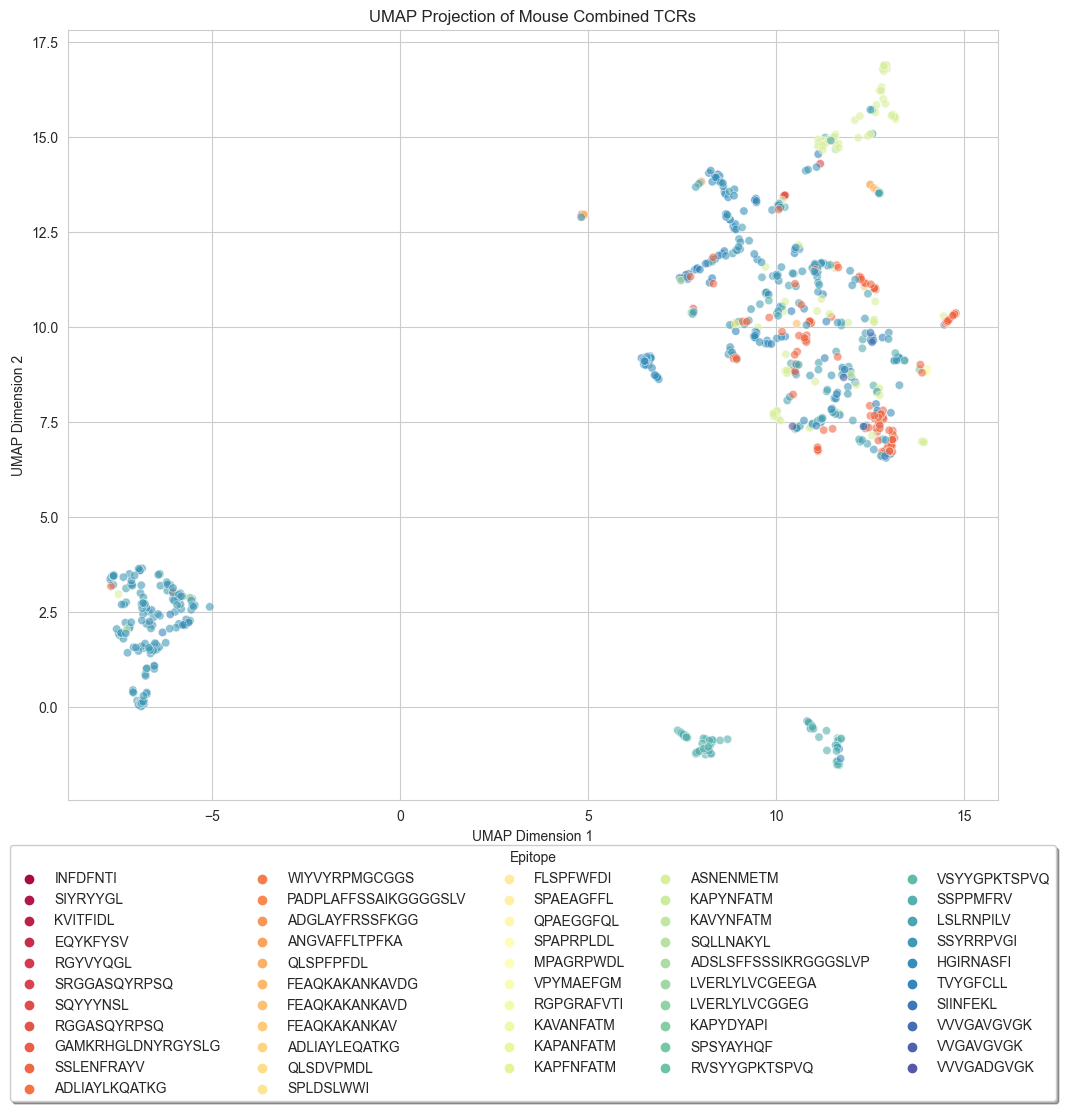

In [26]:
import seaborn as sns
from umap import UMAP

# Assuming your distance matrix is called `mouse_matrix`
# and the corresponding epitopes are in `mouse_combined_epitopes`
# Assuming 'mouse' is your DataFrame with TCR data for the alpha chains of human species
# The DataFrame has a column 'epitope' which contains the epitope information for each TCR
mouse_combined_epitopes = mouse['epitope']

# Apply UMAP dimensionality reduction
reducer = UMAP(random_state=42)
encoded_cdr3 = mouse['encoded_cdr3']
encoded_cdr3=np.array(encoded_cdr3.tolist())
mouse_combined_embedding = reducer.fit_transform(encoded_cdr3)

# Create a DataFrame for the reduced data
embedding_df = pd.DataFrame(mouse_combined_embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['epitope'] = mouse_combined_epitopes.values  # Ensure this is the correct corresponding epitope information

# Plot using seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='epitope', palette='Spectral', alpha=0.6)

# Add a title and labels
plt.title('UMAP Projection of Mouse Combined TCRs')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Move the legend out of the plot
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)

plt.show()

DIMENSIONALITY REDUCTION FOR HUMAN SPECIES FOR ALPHA CHAIN

D:\Program Files (x86)\python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


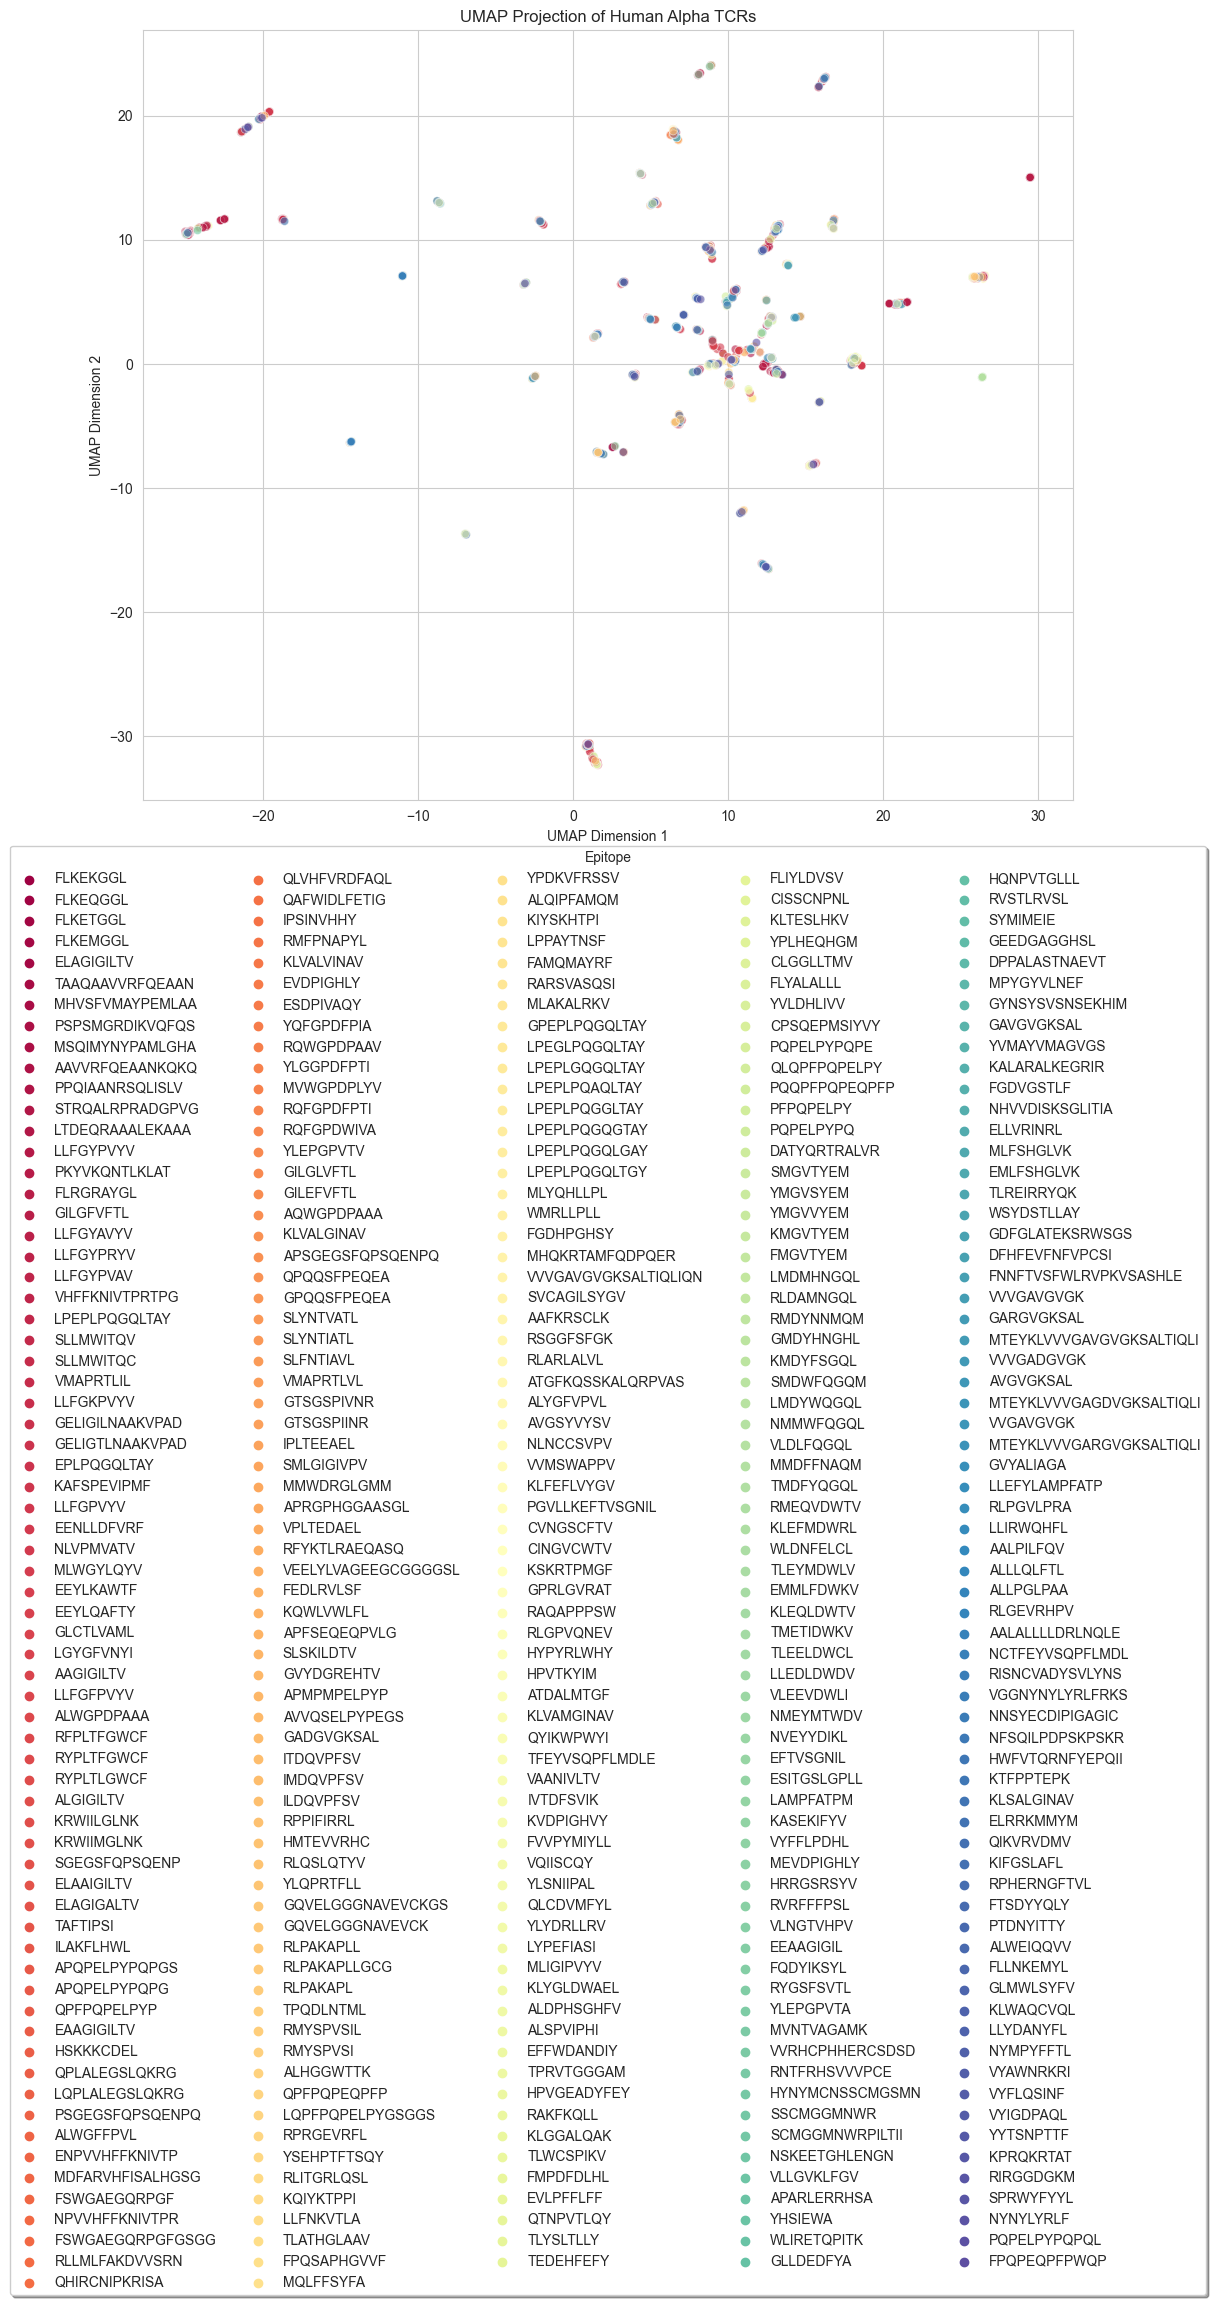

In [28]:
import seaborn as sns
from umap import UMAP

# Assuming your distance matrix is called `human_alpha_matrix`
# and the corresponding epitopes are in `human_alpha_epitopes`
# Assuming 'human_alpha' is your DataFrame with TCR data for the alpha chains of human species
# The DataFrame has a column 'epitope' which contains the epitope information for each TCR
human_alpha_epitopes = human_alpha['epitope']

# Apply UMAP dimensionality reduction
reducer = UMAP(random_state=42)
encoded_cdr3 = human_alpha['encoded_cdr3']
encoded_cdr3=np.array(encoded_cdr3.tolist())
human_alpha_embedding = reducer.fit_transform(encoded_cdr3)

# Create a DataFrame for the reduced data
embedding_df = pd.DataFrame(human_alpha_embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['epitope'] = human_alpha_epitopes.values  # Ensure this is the correct corresponding epitope information

# Plot using seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='epitope', palette='Spectral', alpha=0.6)

# Add a title and labels
plt.title('UMAP Projection of Human Alpha TCRs')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Move the legend out of the plot
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)

plt.show()


DIMENSIONALITY REDUCTION FOR HUMAN SPECIES FOR BETA CHAIN

D:\Program Files (x86)\python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


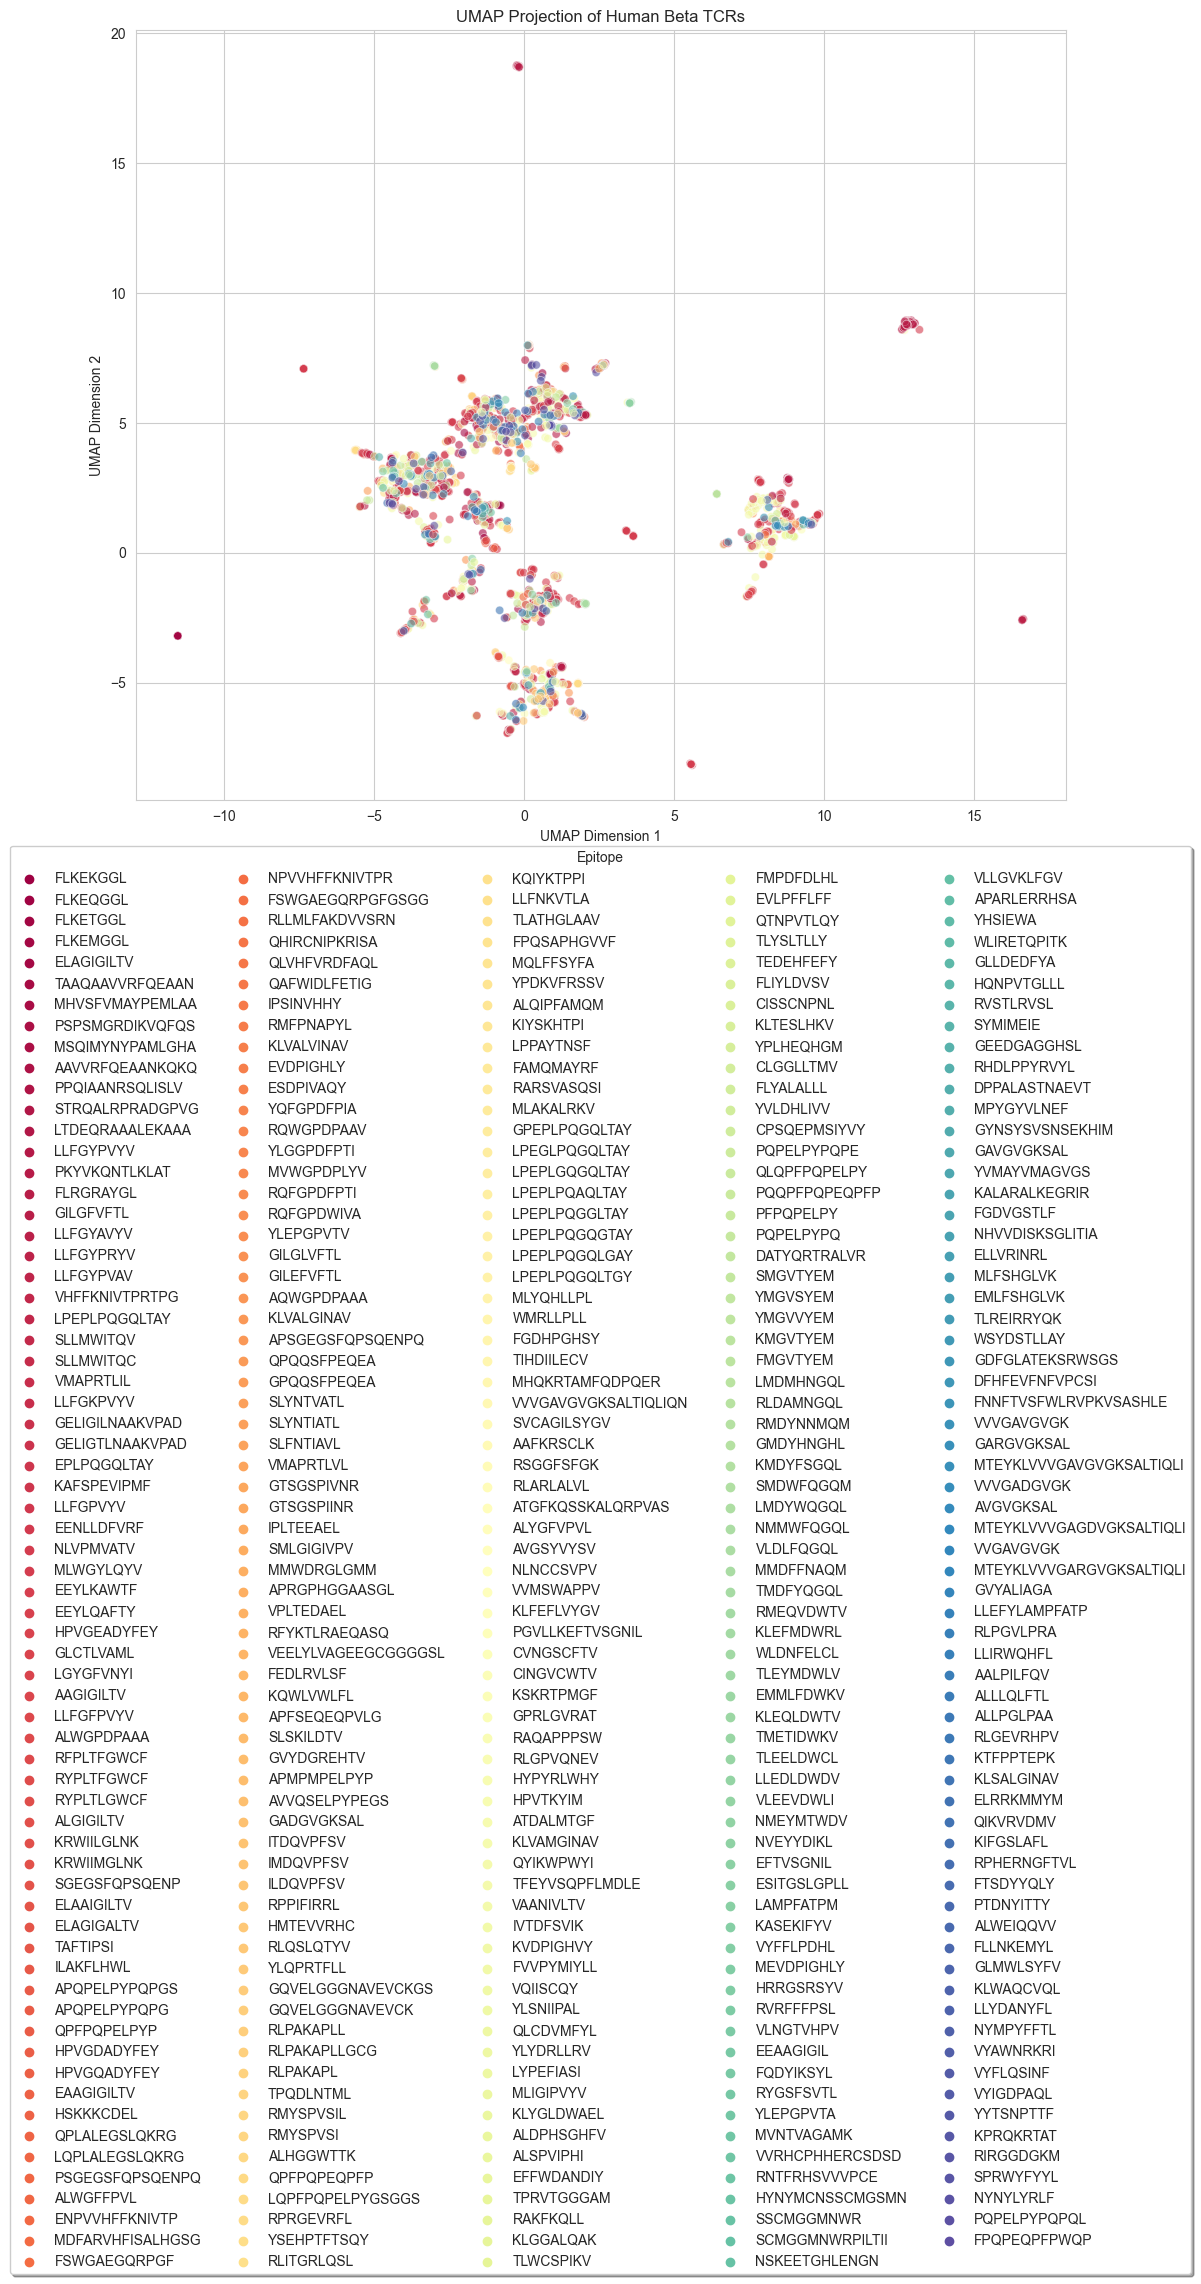

In [29]:
import seaborn as sns
from umap import UMAP

# Assuming your distance matrix is called `human_beta_matrix`
# and the corresponding epitopes are in `human_beta_epitopes`
# Assuming 'human_beta' is your DataFrame with TCR data for the alpha chains of human species
# The DataFrame has a column 'epitope' which contains the epitope information for each TCR
human_beta_epitopes = human_beta['epitope']

# Apply UMAP dimensionality reduction
reducer = UMAP(random_state=42)
encoded_cdr3 = human_beta['encoded_cdr3']
encoded_cdr3=np.array(encoded_cdr3.tolist())
human_beta_embedding = reducer.fit_transform(encoded_cdr3)

# Create a DataFrame for the reduced data
embedding_df = pd.DataFrame(human_beta_embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['epitope'] = human_beta_epitopes.values  # Ensure this is the correct corresponding epitope information

# Plot using seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='epitope', palette='Spectral', alpha=0.6)

# Add a title and labels
plt.title('UMAP Projection of Human Beta TCRs')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Move the legend out of the plot
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)

plt.show()


DIMENSIONALITY REDUCTION FOR HUMAN SPECIES FOR COMBINED ALPHA AND BETA CHAINS

D:\Program Files (x86)\python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


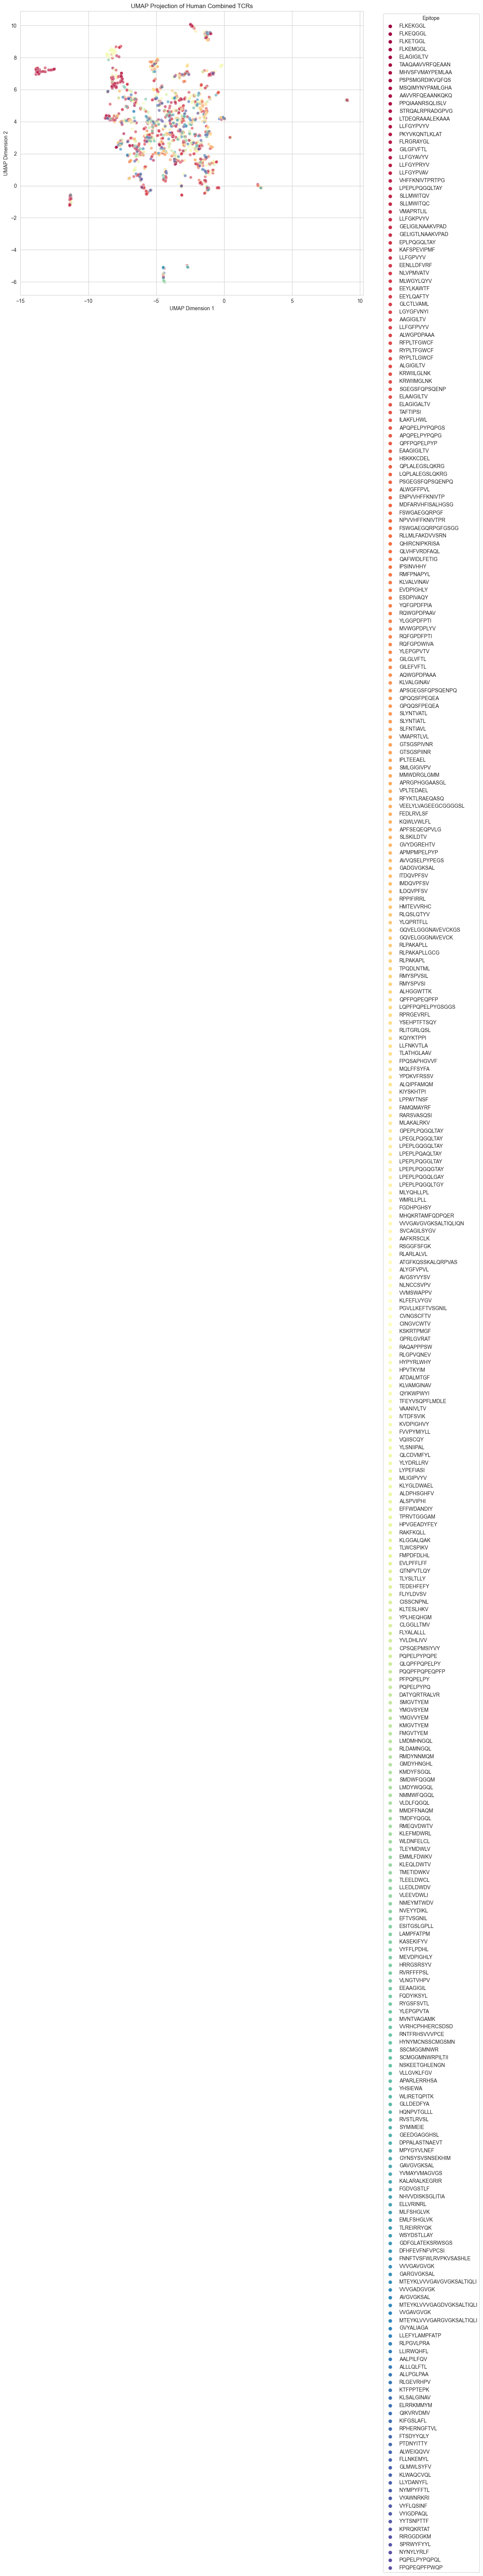

In [30]:
import seaborn as sns
from umap import UMAP

# Assuming your distance matrix is called `human_matrix`
# and the corresponding epitopes are in `human_combined_epitopes`
# Assuming 'human' is your DataFrame with TCR data for the alpha chains of human species
# The DataFrame has a column 'epitope' which contains the epitope information for each TCR
human_combined_epitopes = human['epitope']

# Apply UMAP dimensionality reduction
reducer = UMAP(random_state=42)
encoded_cdr3 = human['encoded_cdr3']
encoded_cdr3=np.array(encoded_cdr3.tolist())
human_combined_embedding = reducer.fit_transform(encoded_cdr3)

# Create a DataFrame for the reduced data
embedding_df = pd.DataFrame(human_combined_embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['epitope'] = human_combined_epitopes.values  # Ensure this is the correct corresponding epitope information

# Plot using seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='epitope', palette='Spectral', alpha=0.6)

# Add a title and labels
plt.title('UMAP Projection of Human Combined TCRs')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Move the legend out of the plot
plt.legend(title='Epitope', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


D:\Program Files (x86)\python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


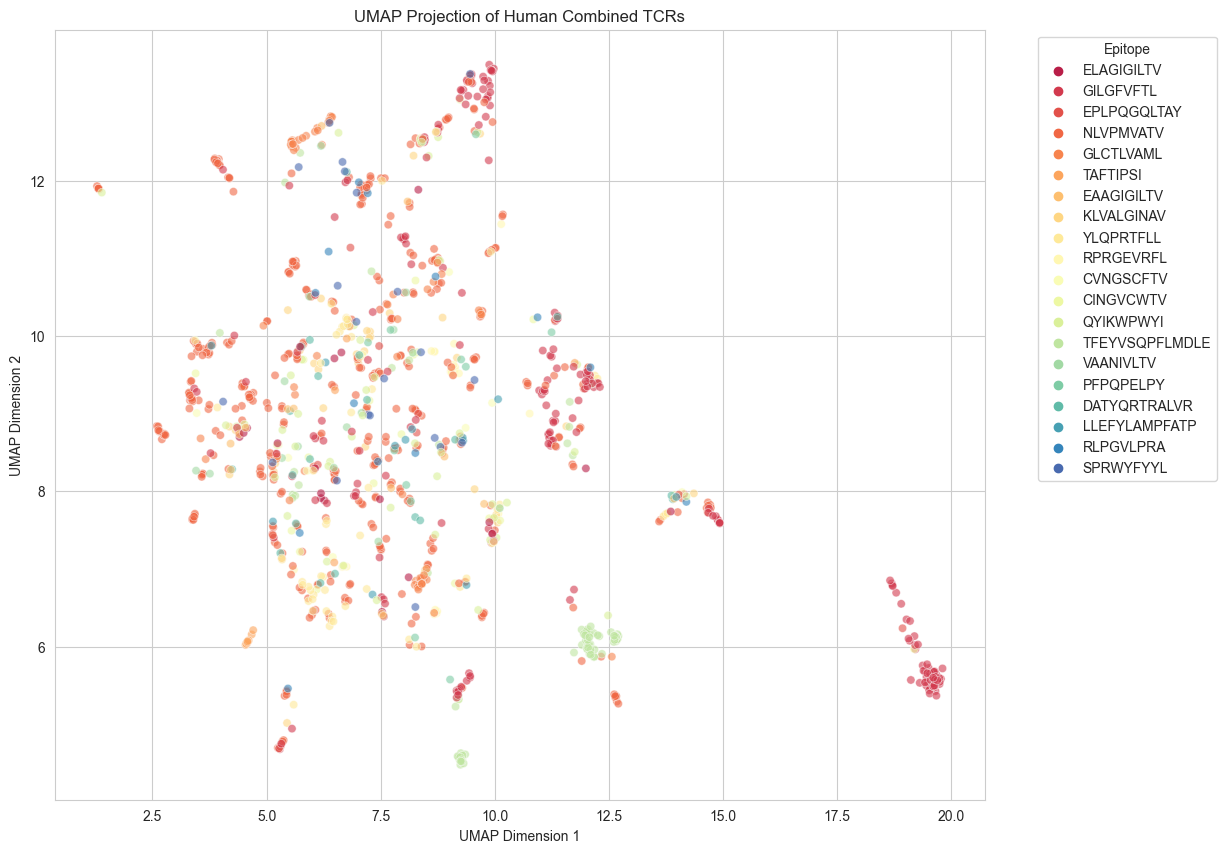

In [34]:
from tcr_sampler import remove_imbalance

# remove the epitopes with less than 10 samples
human = remove_imbalance(human,10)
human_combined_epitopes = human['epitope']

# Apply UMAP dimensionality reduction
reducer = UMAP(random_state=42)
encoded_cdr3 = human['encoded_cdr3']
encoded_cdr3=np.array(encoded_cdr3.tolist())
human_combined_embedding = reducer.fit_transform(encoded_cdr3)

# Create a DataFrame for the reduced data
embedding_df = pd.DataFrame(human_combined_embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['epitope'] = human_combined_epitopes.values  # Ensure this is the correct corresponding epitope information

# Plot using seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='epitope', palette='Spectral', alpha=0.6)

# Add a title and labels
plt.title('UMAP Projection of Human Combined TCRs')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Move the legend out of the plot
plt.legend(title='Epitope', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

